# importing the liberaryes

In [20]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
#import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from sklearn.metrics import  classification_report , f1_score

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
with_mask_path = r'C:\Users\windows\Desktop\face mask\data\with_mask'
without_mask_path = r'C:\Users\windows\Desktop\face mask\data\without_mask'
with_mask =os.listdir(with_mask_path)
without_mask =os.listdir(without_mask_path)

In [3]:
print(f'Num of mask ex : {len(with_mask)}')
print(f'Num of without mask ex : {len(without_mask)}')

Num of mask ex : 3725
Num of without mask ex : 3828


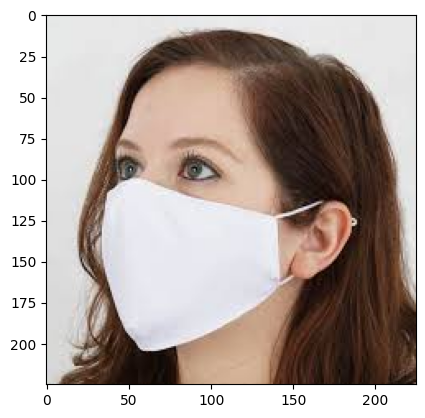

In [4]:
rand_image = random.choice(os.listdir(with_mask_path))
im_psth = os.path.join(with_mask_path,rand_image)

image = plt.imread(im_psth)
plt.imshow(image)

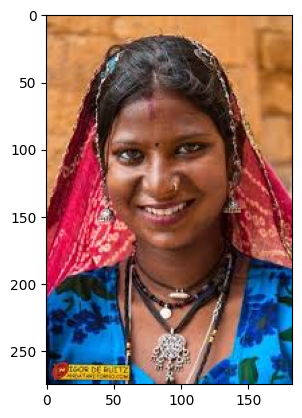

In [5]:
rand_image = random.choice(os.listdir(without_mask_path))
im_psth = os.path.join(without_mask_path,rand_image)

image = plt.imread(im_psth)
plt.imshow(image)

# labeling , convert data and preprocessing

In [6]:
def preprocessing(dir_path, label):
    images, labels = [], []
    for im_file in os.listdir(dir_path):
        image_path = os.path.join(dir_path, im_file)
        if os.path.isfile(image_path):
            image = Image.open(image_path)
            image = image.resize((128, 128))
            image = image.convert('RGB')
            image = np.array(image) / 255.0   # Normalize
            images.append(image)
            labels.append(label)
    return images, labels


In [7]:
with_mask_images , mask_labels = preprocessing(with_mask_path,1)
without_mask_images , without_mask_labels = preprocessing(without_mask_path,0)
data = []
data.extend(with_mask_images)
data.extend(without_mask_images)
labels = []
labels.extend(mask_labels)
labels.extend(without_mask_labels)

print(len(data))
print(len(labels))

c:\Users\windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7553
7553


In [8]:
x = np.array(data)
y = np.array(labels)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [9]:
print(f'x_train shape : {x_train.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'x_test shape : {x_test.shape}')
print(f'y_test shape : {y_test.shape}')

x_train shape : (6042, 128, 128, 3)
y_train shape : (6042,)
x_test shape : (1511, 128, 128, 3)
y_test shape : (1511,)


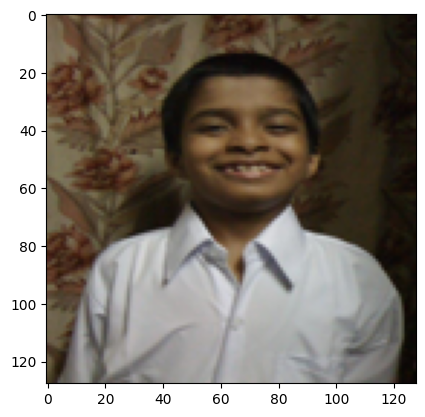

In [10]:
plt.imshow(data[-1])

In [11]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [12]:
# # Apply data augmentation to the training data
# train_generator = datagen.flow(x_train, y_train, batch_size=32)

In [13]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
compiler = model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    validation_data=(x_test, y_test),
    epochs=10
)
# history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

c:\Users\windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 104s 445ms/step - accuracy: 0.6991 - loss: 0.5599 - val_accuracy: 0.8974 - val_loss: 0.2728
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 63s 334ms/step - accuracy: 0.8386 - loss: 0.3855 - val_accuracy: 0.9153 - val_loss: 0.2332
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 58s 304ms/step - accuracy: 0.8635 - loss: 0.3200 - val_accuracy: 0.9212 - val_loss: 0.2175
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 59s 314ms/step - accuracy: 0.8790 - loss: 0.2974 - val_accuracy: 0.9298 - val_loss: 0.1961
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 57s 303ms/step - accuracy: 0.8868 - loss: 0.2691 - val_accuracy: 0.9358 - val_loss: 0.1791
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 79s 290ms/step - accuracy: 0.9079 - loss: 0.2449 - val_accuracy: 0.9332 - val_loss: 0.1804
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 55s 288ms/step - accuracy: 0.9151 - loss: 0.2424 - val_accuracy: 0.9325 - val_loss: 0.1795
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 55s 293ms/step - accuracy: 0.9105 - loss: 

In [21]:
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)



48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step
F1 Score: 0.9650067294751009


In [22]:
print(classification_report(y_test, y_pred, target_names=["Without Mask", "With Mask"]))

              precision    recall  f1-score   support

Without Mask       0.96      0.97      0.97       766
   With Mask       0.97      0.96      0.97       745

    accuracy                           0.97      1511
   macro avg       0.97      0.97      0.97      1511
weighted avg       0.97      0.97      0.97      1511



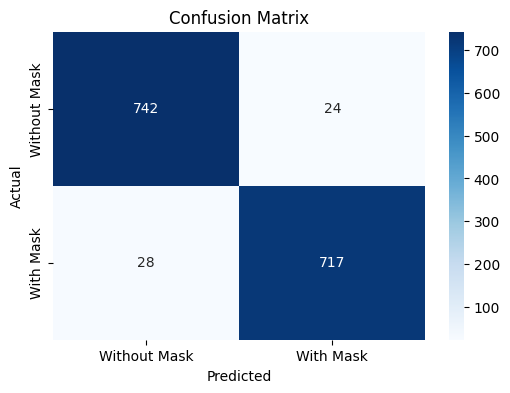

In [23]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Without Mask', 'With Mask'],
            yticklabels=['Without Mask', 'With Mask'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
def plot_training_history(history):
    plt.figure(figsize=(12,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

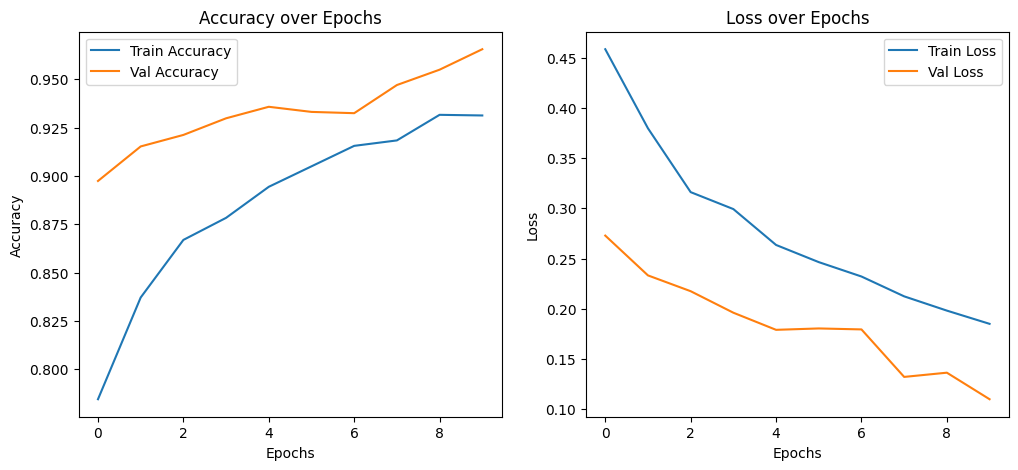

In [17]:
plot_training_history(history)

In [24]:
model.save("mask_model.h5")